i= 1
n = 1
n = 2
n = 3
n = 4
n = 5
n = 6
n = 7
n = 8
n = 9
n = 10
n = 11
i= 2
n = 12
n = 13
n = 14
n = 15
n = 16
n = 17
n = 18
n = 19
n = 20
n = 21
i= 3
n = 22
n = 23
n = 24
n = 25
n = 26
n = 27
n = 28
n = 29
n = 30
n = 31
i= 4
n = 32
n = 33
n = 34
n = 35
n = 36
n = 37
n = 38
n = 39
n = 40
n = 41
i= 5
n = 42
n = 43
n = 44
n = 45
n = 46
n = 47
n = 48
n = 49
n = 50
n = 51
n = 52
i= 6
n = 53
n = 54
n = 55
n = 56
n = 57
n = 58
n = 59
n = 60
n = 61
n = 62
i= 7
n = 63
n = 64
n = 65
n = 66
n = 67
n = 68
n = 69
n = 70
n = 71
n = 72
i= 8
n = 73
n = 74
n = 75
n = 76
n = 77
n = 78
n = 79
n = 80
n = 81
n = 82
i= 9
n = 83
n = 84
n = 85
n = 86
n = 87
n = 88
n = 89
n = 90
n = 91
n = 92
i= 10
n = 93
n = 94
n = 95
n = 96
n = 97
n = 98
n = 99
n = 100
n = 101
n = 102
n = 103
i= 11
n = 104
n = 105
n = 106
n = 107
n = 108
n = 109
n = 110
n = 111
n = 112
n = 113
i= 12
n = 114
n = 115
n = 116
n = 117
n = 118
n = 119
n = 120
n = 121
n = 122
n = 123
i= 13
n = 124
n = 125
n = 126
n = 127
n = 128
n = 129
n = 130

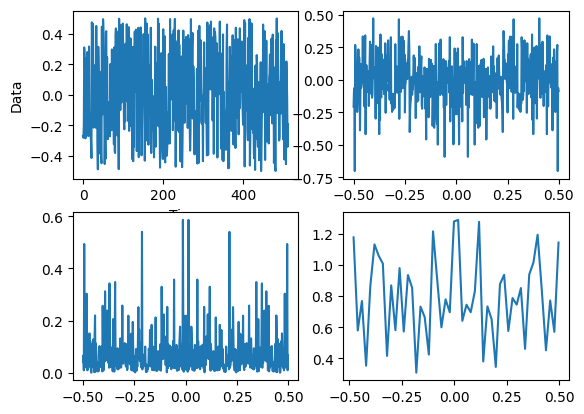

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# READING THE FILE ******************************************************

with open('noise.txt') as file:
    data = file.readlines()
    data = [float(item.rstrip()) for item in data]

N = len(data)
time_values = [i for i in range(N)]

# FINDING DFT ***********************************************************

dft_result = np.fft.fft(data, norm='ortho')
frequency_values = np.fft.fftfreq(N)               # JUST GIVES q/N

sorted_values = []
for i in range(N):
    sorted_values.append([frequency_values[i], dft_result[i]])
sorted_values.sort(key=lambda x: x[0])

frequency_sorted, dft_sorted = [], []
for i in range(N):
    frequency_sorted.append(sorted_values[i][0])
    dft_sorted.append(sorted_values[i][1])

# OBTAINING THE POWER SPECTRUM ********************************************

power_spectrum = [np.abs(x)**2 for x in dft_sorted]

# BINNING THE SPECTRUM ****************************************************

min_frequency, max_frequency = frequency_sorted[0], frequency_sorted[-1]
num_bins = 50
delta_frequency = (max_frequency - min_frequency) / num_bins
frequency_bins, power_bins = [], []

d = delta_frequency
n = 0
for i in range(1, num_bins + 1):
    power_binned = 0
    print('i=', i)
    while frequency_sorted[n] < frequency_sorted[0] + i * d:
        power_binned += power_spectrum[n]
        n += 1
        print('n =', n)
        if n == len(frequency_sorted):
            break
    power_bins.append(power_binned)
    frequency_bins.append(frequency_sorted[0] + i * d)

# PLOTTING EVERYTHING ****************************************************

figure, ax = plt.subplots(2, 2)

ax[0, 0].plot(time_values, data)
ax[0, 0].set_xlabel('Time')
ax[0, 0].set_ylabel('Data')

ax[0, 1].plot(frequency_sorted, dft_sorted)

ax[1, 0].plot(frequency_sorted, power_spectrum)

ax[1, 1].plot(frequency_bins, power_bins)

plt.show()
